In [1]:
#Rod Ta
#11/13
#Regression Methods

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

print (boston.data.shape)
#print (boston.target)

(506, 13)


In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df.head()

#housing all 
HA = df.iloc[:,:].values
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
#display correlation table for every feature
print(df.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

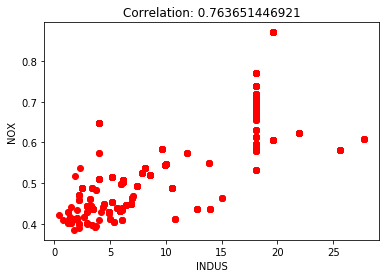

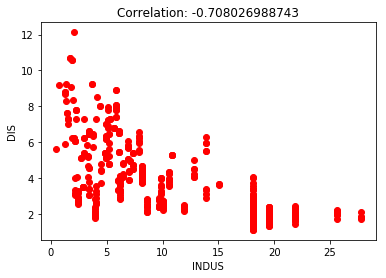

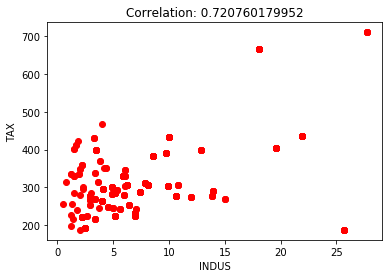

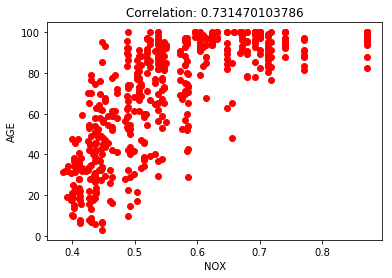

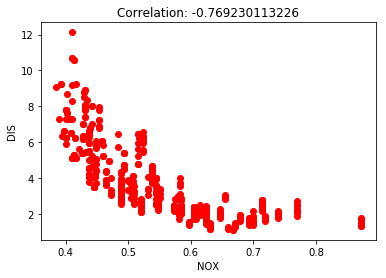

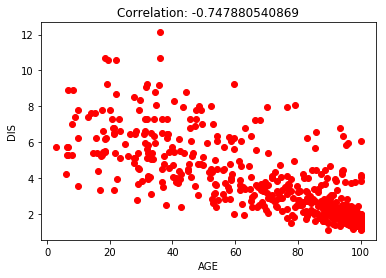

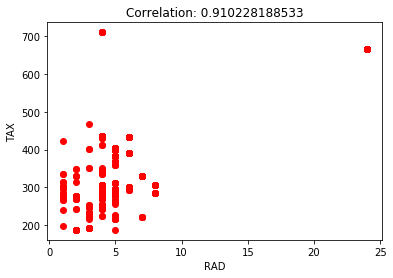

In [6]:
#Finding which features have good correlations
#I consider any correlation with the absolute value over 0.7 good
for i in range(0,12):
    x = i+1
    for j in range (x,13):
        a = HA[:,i]
        b = HA[:,j]
        corr = (np.corrcoef(a,b)[:1,1][0]).astype(float)
        if abs(corr) > 0.7:
            pl.plot(a, b,'ro')
            pl.xlabel(boston.feature_names[i])
            pl.ylabel(boston.feature_names[j])
            s = "Correlation: " + str(corr)
            pl.title(s)
            pl.show()

In [7]:
#Features(X): used are everything from column 0 to 11 (CRIM to B)
#Target(y) is column 12 (LSTAT)
X = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

#X = HA[:,0:11]
#y = HA[:,12]

X_train, X_test, y_train, y_test = train_test_split(
            X,y, test_size=0.50, random_state=0)


Regression score:  0.666170144748


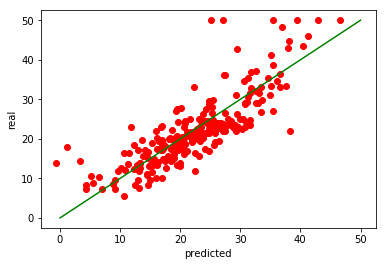

In [8]:
#Linear Regression
linreg = LinearRegression()
linreg = linreg.fit(X_train,y_train)
yTestPred = linreg.predict(X_test)
print("Regression score: ",r2_score(y_test, yTestPred))



pl.plot(yTestPred, y_test,'ro')
pl.plot([0,50],[0,50], 'g')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Regression score:  0.66243501234


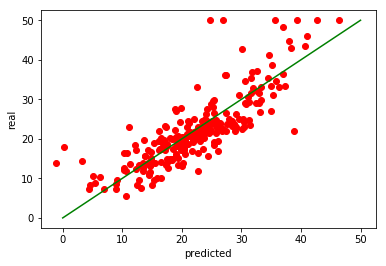

In [9]:
#Ridge Regression
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge = ridge.fit(X_train,y_train)
yTestPred = ridge.predict(X_test)
print("Regression score: ",r2_score(y_test, yTestPred))
pl.plot(yTestPred, y_test,'ro')
pl.plot([0,50],[0,50], 'g')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [10]:
#Features(X) : age
#Target(y): dis

X = HA[:,0:6]
y = HA[:,7]

X_train, X_test, y_train, y_test = train_test_split(
            X,y, test_size=0.50, random_state=0)


Regression score:  0.719410055535
red = test
green = train


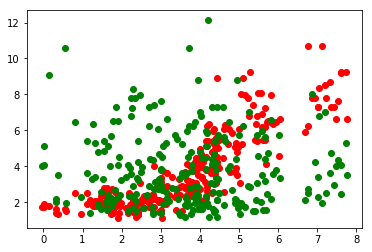

In [11]:
#Linear Regression
linreg = LinearRegression()
linreg = linreg.fit(X_train,y_train)
yTestPred = linreg.predict(X_test)
yTrainPred = linreg.predict(X_test)
print("Regression score: ",r2_score(y_test, yTestPred))


print("red = test")
print("green = train")
pl.plot(yTestPred, y_test,'ro')
pl.plot(yTrainPred, y_train,'go')

pl.show()

Regression score:  0.722772268228
red = test
green = train


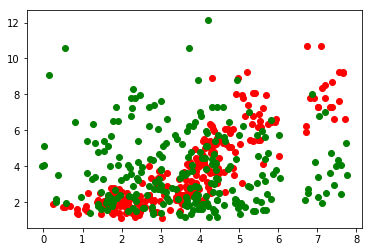

In [12]:
#Ridge Regression
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge = ridge.fit(X_train,y_train)
yTestPred = ridge.predict(X_test)
print("Regression score: ",r2_score(y_test, yTestPred))


print("red = test")
print("green = train")
pl.plot(yTestPred, y_test,'ro')
pl.plot(yTrainPred, y_train,'go')

pl.show()

In [13]:
'''
Discussion:

Features that are correlated:
I ran a loop through all the data to find the correlation in a matix table
I consider any correlation with the absolute value over 0.7 good, and got the following features:
    -nox, indus with a correlation of 764
    -dis, indus with a correlation of -.708
    -tax, indus with a correlation of .721
    -age, nox with a correlation of .731
    -dis, nox with a correlation of .769 
    -dis, age with a correlation of -.748
    -tax, rad with a correlation of .910

Predicting features in dataset:
I used two different regression methods for prediction:
    - Linear regression
    - Ridge Regression

For my first case, I chose every features from columns 0 to 11 to predict 'LSTAT' from column 12.
For Linear regression, I got a Regression score of 0.666170144748 and for Ridge regression, I got a Regression score 
of 0.66243501234.

For my second case, I chose features from columns 0 to 6 to predict 'dis' from column 7.
For Linear regression, I got a Regression score of 0.719410055535 and for Ridge regression, I got a Regression score 
of 0.722772268228

Since the best possible Regression score is 1, I would say the 2 cases I tested did fairly well in predicting the 
targeted feature.


'''

"\nDiscussion:\n\nFeatures that are correlated:\nI ran a loop through all the data to find the correlation in a matix table\nI consider any correlation with the absolute value over 0.7 good, and got the following features:\n    -nox, indus with a correlation of 764\n    -dis, indus with a correlation of -.708\n    -tax, indus with a correlation of .721\n    -age, nox with a correlation of .731\n    -dis, nox with a correlation of .769 \n    -dis, age with a correlation of -.748\n    -tax, rad with a correlation of .910\n\nPredicting features in dataset:\nI used two different regression methods for prediction:\n    - Linear regression\n    - Ridge Regression\n\nFor my first case, I chose every features from columns 0 to 11 to predict 'LSTAT' from column 12.\nFor Linear regression, I got a Regression score of 0.666170144748 and for Ridge regression, I got a Regression score \nof 0.66243501234.\n\nFor my second case, I chose features from columns 0 to 6 to predict 'dis' from column 7.\nFo